# 라이브러리

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')

In [99]:
dt = pd.read_csv('./data/income.csv',index_col=0)

In [ ]:
dt.T.isna().sum()

0     18
1     18
2    108
3     12
4     12
5     12
6     12
dtype: int64

In [100]:
# 100만원 미만 , 100~200만원 미만 -> 200만원 미만으로 합치기
dt_m = dt.iloc[:3,:]
dt_m.fillna(method='ffill',inplace=True)
dt_m.drop(index=[0,1],inplace=True)
dt.drop(index=[0,1],inplace=True)

In [75]:
dt

,구분,2003,2003건강,2003재정,2003관계,2003가정,2003사회,2004,2004건강,2004재정,...,2020재정,2020관계,2020가정,2020사회,2021,2021건강,2021재정,2021관계,2021가정,2021사회
2,200만원 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.22,6.16,5.95,5.86,5.16,5.47,4.30,5.48,5.39,5.16
3,200-300만원 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.57,6.39,6.36,6.16,6.03,6.45,5.33,6.20,6.23,5.97
4,300-400만원 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.98,6.65,6.65,6.45,6.22,6.60,5.63,6.33,6.39,6.17
5,400-500만원 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.21,6.82,6.87,6.64,6.41,6.87,5.83,6.48,6.56,6.31
6,500만원 이상,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.42,6.91,7.04,6.73,6.62,6.93,6.18,6.67,6.79,6.52


In [71]:
dt.T.isna().sum() # 동일한 기간에만 결측값 생김

2    12
3    12
4    12
5    12
6    12
dtype: int64

# 데이터 처리

In [101]:
dt.reset_index(drop=True, inplace=True)
dt.dropna(axis=1,inplace=True)
dt

,구분,2005,2005건강,2005재정,2005관계,2005가정,2005사회,2006,2006건강,2006재정,...,2020재정,2020관계,2020가정,2020사회,2021,2021건강,2021재정,2021관계,2021가정,2021사회
0,200만원 미만,5.98,6.34,4.53,6.45,6.48,6.09,5.96,6.34,4.53,...,5.22,6.16,5.95,5.86,5.16,5.47,4.30,5.48,5.39,5.16
1,200-300만원 미만,6.43,6.77,5.18,6.77,6.92,6.49,6.45,6.76,5.25,...,5.57,6.39,6.36,6.16,6.03,6.45,5.33,6.20,6.23,5.97
2,300-400만원 미만,6.64,6.91,5.52,6.89,7.16,6.72,6.70,6.92,5.58,...,5.98,6.65,6.65,6.45,6.22,6.60,5.63,6.33,6.39,6.17
3,400-500만원 미만,6.76,6.93,5.70,7.06,7.27,6.85,6.84,7.03,5.77,...,6.21,6.82,6.87,6.64,6.41,6.87,5.83,6.48,6.56,6.31
4,500만원 이상,6.92,6.90,6.02,7.18,7.46,7.07,6.95,7.01,6.06,...,6.42,6.91,7.04,6.73,6.62,6.93,6.18,6.67,6.79,6.52


In [25]:
dt.isna().sum().sum()

0

In [102]:
income_year = pd.DataFrame()
years = ['2012','2013','2014','2016','2017','2018','2019','2021'] # 2015 값 없음


for y in years:
    df = dt.melt(id_vars='구분',value_vars=y,var_name='년도',value_name='소계')
    income_year = pd.concat([income_year,df],axis=0)

income_year.sort_values(['구분','년도'],inplace=True)
income_year.reset_index(drop=True, inplace=True)
income_year['소계'] = income_year['소계'].astype(float)

In [82]:
income_year['구분'].unique()

array(['200-300만원 미만', '200만원 미만', '300-400만원 미만', '400-500만원 미만',
       '500만원 이상'], dtype=object)

In [103]:
lst = ['200만원 미만','200-300만원 미만', '300-400만원 미만', '400-500만원 미만','500만원 이상']

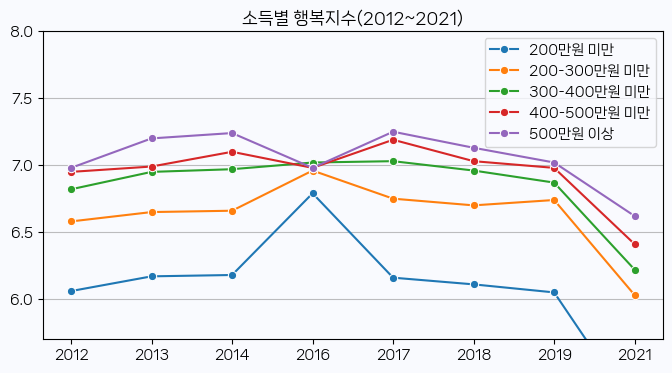

In [105]:
plt.figure(figsize=(8,4))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for a in lst:
    data = income_year[income_year['구분']==a]
    sns.lineplot(x='년도', y='소계',data=data, marker='o')
plt.grid(True,axis='y',color='gray',alpha=0.5)
plt.ylim(5.7,8.)
plt.legend(lst)
plt.xlabel(None)
plt.ylabel(None)
plt.title('소득별 행복지수(2012~2021)')
plt.savefig('./png/income.png')

In [106]:
year = ['2012','2013','2014','2016','2017','2018','2019','2020','2021']
labels= ['건강','재정','관계','가정','사회']
index = np.arange(len(labels))
colors = ['#3AB0FF', '#FFB562', '#F87474', '#F4E06D','#C499BA']

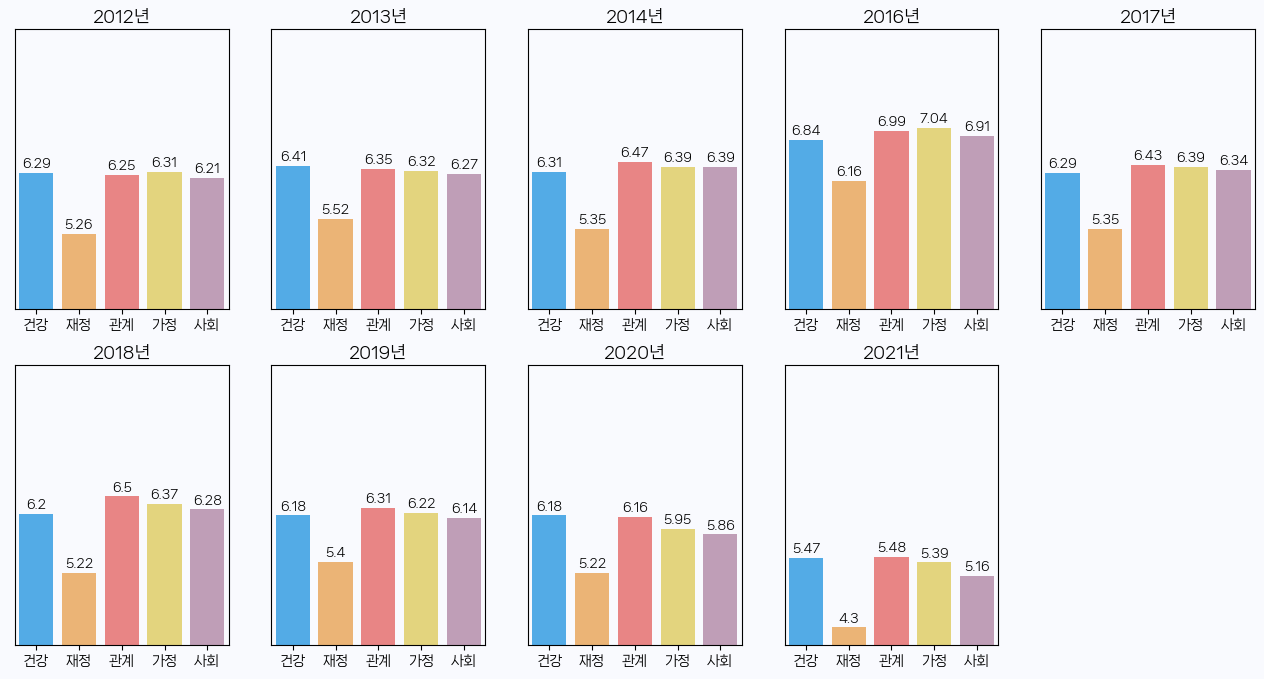

In [107]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[0,f'{y}':f'{y}사회'])
    pie.rename(columns={0:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(4,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('seoul_pie.png')
plt.savefig('./png/200미만.png')
plt.show()

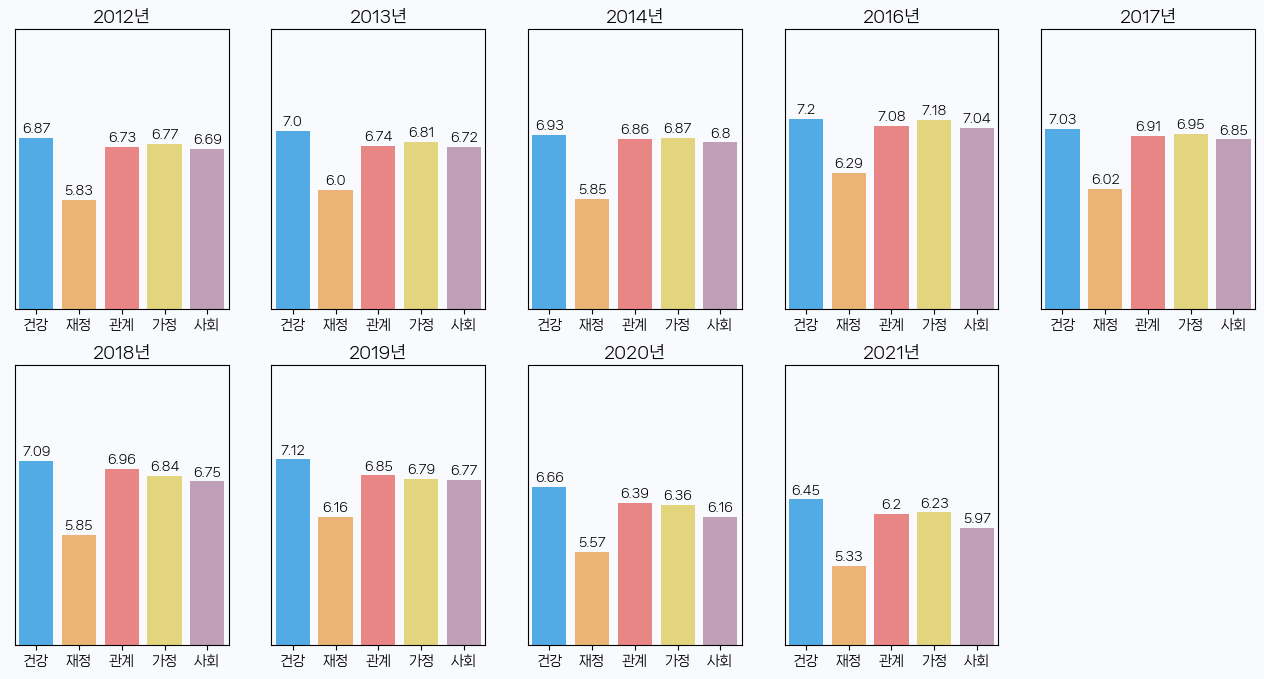

In [108]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[1,f'{y}':f'{y}사회'])
    pie.rename(columns={1:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(4,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('seoul_pie.png')
plt.savefig('./png/200300.png')
plt.show()

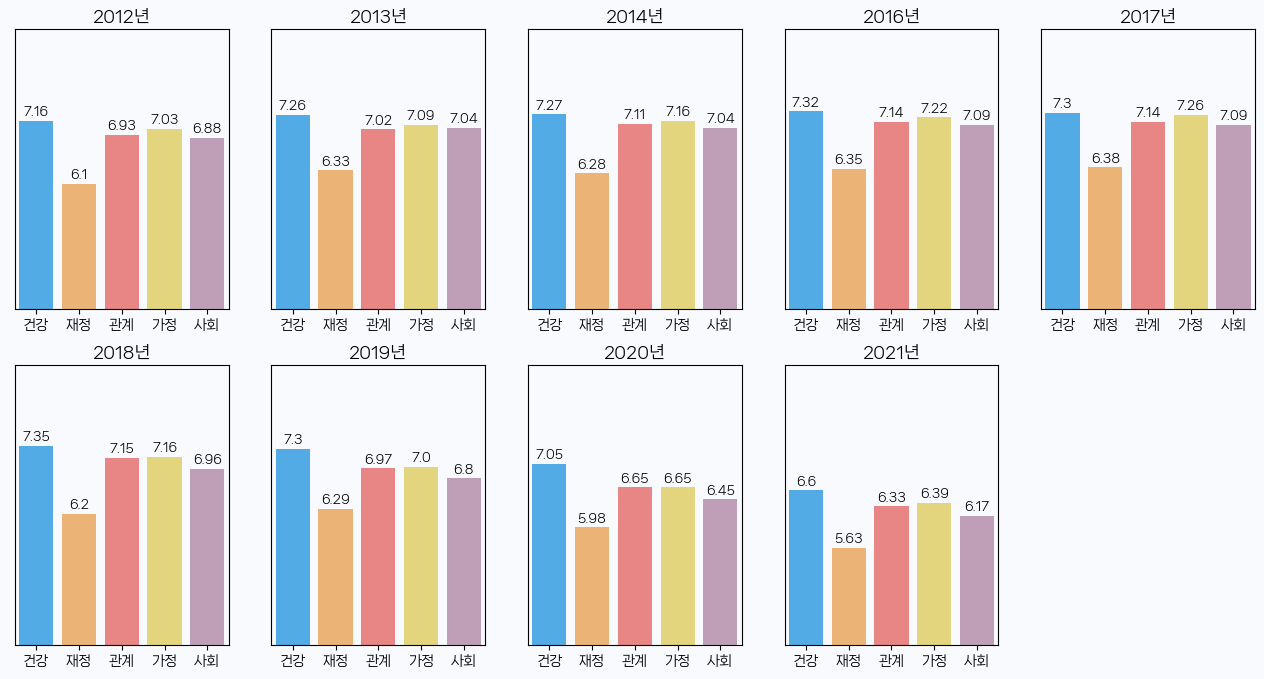

In [109]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[2,f'{y}':f'{y}사회'])
    pie.rename(columns={2:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(4,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('seoul_pie.png')
plt.savefig('./png/300400.png')
plt.show()

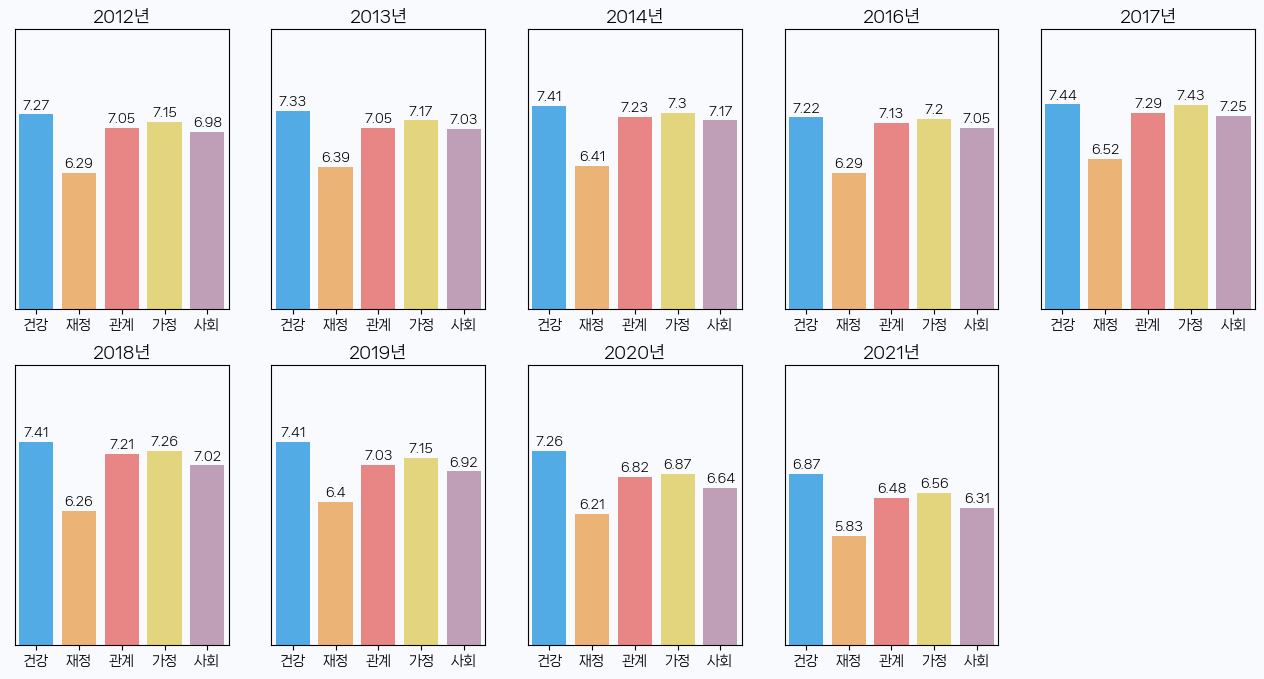

In [110]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[3,f'{y}':f'{y}사회'])
    pie.rename(columns={3:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(4,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('seoul_pie.png')
plt.savefig('./png/400500.png')
plt.show()

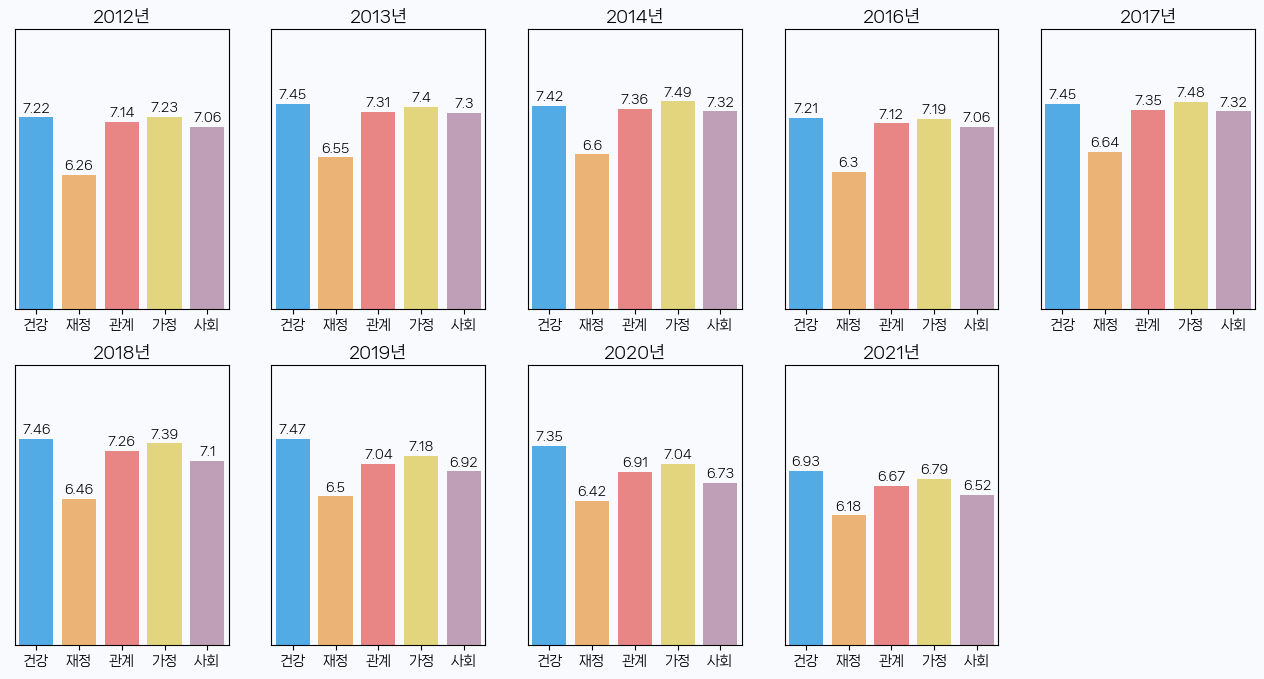

In [111]:
plt.figure(figsize=(16,8))
#그래프 내부 배경 색

mpl.rc('axes', facecolor = '#F9FAFE', edgecolor = 'k')

#그래프 외부 배경 색

mpl.rc('figure', facecolor = '#F9FAFE', edgecolor ='#F9FAFE')
for i,y in enumerate(year):
    pie = pd.DataFrame(dt.loc[4,f'{y}':f'{y}사회'])
    pie.rename(columns={4:'idx'},inplace=True)
    pie.drop(index=y,inplace=True)
    # print(pie.iloc[:,:])
    
    i += 1
    plt.subplot(2,5,i)
    g = sns.barplot(data=pie,x=labels,y='idx',palette=colors)
    ax = g
    ax.get_yaxis().set_visible(False)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height+0.1, height, ha = 'center', size = 9)

    plt.title(f'{y}년')
    plt.ylim(4,8.7)
    plt.ylabel('')
    plt.xticks(index, labels)

# plt.savefig('seoul_pie.png')
plt.savefig('./png/500over.png')
plt.show()